# ***ĐỒ ÁN THỰC HÀNH CUỐI KỲ***

## Môn: **Toán ứng dụng và thống kê**
## Họ và tên: **Trương Tấn Đạt**
## MSSV: **21120050**
## Lớp: **21_2**

## *ĐỀ BÀI*
Ứng dụng của đại số tuyến tính trong bài toán minh họa các phép biến trong $R^2$

---

## **I. THƯ VIỆN VÀ CÁC HÀM HỖ TRỢ**

### 1. Thư viện hỗ trợ:

In [43]:
import matplotlib.pyplot as plt
import math

### 2. Hàm <code>mul_matrix(A, B)</code>:

Thực hiện nhân ma trận $A$ với ma trận $B$

In [44]:
def mul_matrix(A, B):
    m = len(A)
    n = len(B)
    p = len(B[0])
    res = []
    for i in range(m):
        res.append([])
        for j in range(p):
            res[i].append(0)
            for k in range(n):
                res[i][j] += A[i][k] * B[k][j]
    return res

### 3. Hàm <code>illustrate(orignal, standard, color)</code>:
Minh họa ma trận <code>original</code> và ma trận sau khi qua phép biến hình trên đồ thị được vẽ bằng thư viện <code>matplotlib<code>.

In [45]:
def illustrate(original, standard, color):
    # tạo ma trận điểm đơn vị
    unit_points_matrix = [[0, 0, 1, 1], [0, 1, 1, 0]]

    # tính toán các điểm biểu diễn từ ma trận gốc và ma trận điểm đơn vị
    original_points = mul_matrix(original, unit_points_matrix)

    # trích xuất tọa độ x, y của các điểm để vẽ
    x_original = []
    y_original = []
    for i in range(len(original_points[0])):
        x_original.append(original_points[0][i])
        y_original.append(original_points[1][i])
    
    # lặp lại điểm đầu tiên để vẽ đường thẳng đóng
    x_original.append(original_points[0][0])
    y_original.append(original_points[1][0])

    # tính toán các điểm biểu diễn từ ma trận chuẩn và ma trận điểm đơn vị
    transformed_points_matrix = mul_matrix(standard, unit_points_matrix)
    x = []
    y = []
    for i in range(len(transformed_points_matrix[0])):
        x.append(transformed_points_matrix[0][i])
        y.append(transformed_points_matrix[1][i])
    
    # lặp lại điểm đầu tiên để vẽ đường thẳng đóng
    x.append(transformed_points_matrix[0][0])
    y.append(transformed_points_matrix[1][0])

    # vẽ đồ thị
    plt.figure(figsize=(5, 5)) # tạo khung vẽ với kích thước 5x5
    plt.plot(x_original, y_original, 'g--', linewidth = 3) # vẽ hình ảnh gốc màu xanh lá
    plt.plot(x, y, color, linewidth = 3) # vẽ hình ảnh sau khi qua phép biến đổi màu color
    plt.axis([-5, 5, -5, 5]) # đặt giới hạn trục x và y (tùy theo kích thước của hình để đặt giới hạn phù hợp)
    plt.grid(True) # vẽ lưới

## **II. MINH HỌA CÁC PHÉP BIẾN HÌNH**

Ta sẽ sử dụng ma trận 
$
A = \begin{bmatrix*}
2 && 0 \\
0 && 2 \\
\end{bmatrix*}
$
để minh họa các phép biến hình trên hệ trục tọa độ. <br>

*Ma trận ban đầu sẽ được minh họa bằng nét đứt, ma trận qua phép biến hình sẽ được minh họa bằng nét liền (khác màu). Trong trường hợp hai ma trận có những đoạn thẳng đè lên nhau thì chỉ thấy được những đoạn thẳng có màu của ma trận kết quả.*

Text(0.5, 1.0, 'Original matrix')

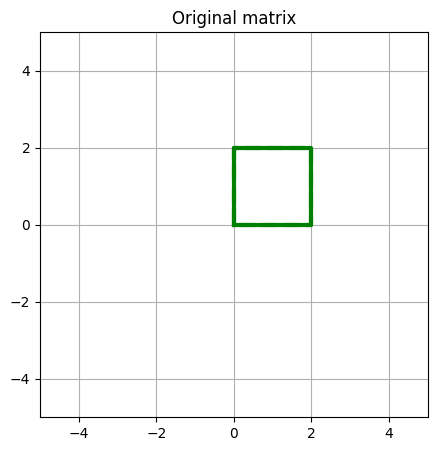

In [46]:
matrix = [[2, 0], [0, 2]]
illustrate(matrix, matrix, 'g')
plt.title('Original matrix')

### 1. Phép phản chiếu qua trục Y:

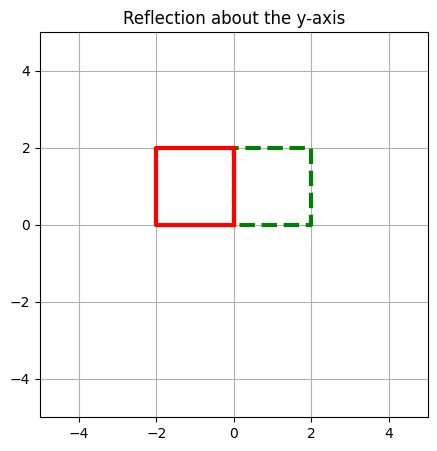

In [47]:
def reflect_y(matrix):
    reflect_y_matrix = [[-2, 0], [0, 2]]
    illustrate(matrix, reflect_y_matrix, 'r')
    plt.title('Reflection about the y-axis')
    
reflect_y(matrix)

### 2. Phép phản chiếu qua trục X:

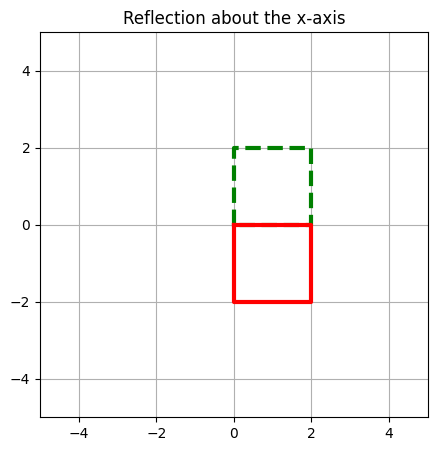

In [48]:
def reflect_x(matrix):
    reflect_x_matrix = [[2, 0], [0, -2]]
    illustrate(matrix, reflect_x_matrix, 'r')
    plt.title('Reflection about the x-axis')

reflect_x(matrix)

### 3. Phép phản chiếu qua đường thẳng y = x:

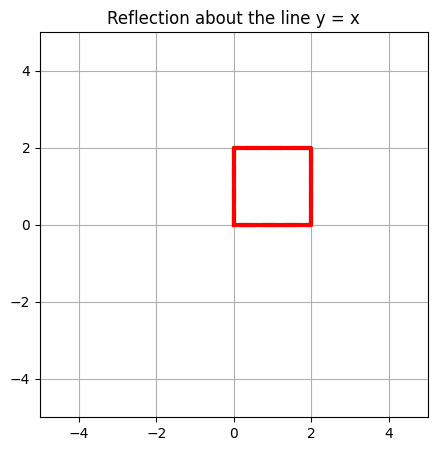

In [49]:
def reflect_y_x(matrix):
    reflect_y_x_matrix = [[2, 0], [0, 2]]
    illustrate(matrix, reflect_y_x_matrix, 'r')
    plt.title('Reflection about the line y = x')

reflect_y_x(matrix)

### 4. Phép phản chiếu qua đường thẳng y = -x:

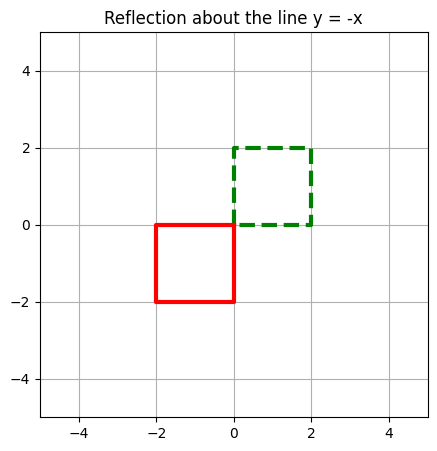

In [50]:
def reflect_y_neg_x(matrix):
    reflect_y_neg_x_matrix = [[-2, 0], [0, -2]]
    illustrate(matrix, reflect_y_neg_x_matrix, 'r')
    plt.title('Reflection about the line y = -x')

reflect_y_neg_x(matrix)

### 5. Phép xoay quanh hình ảnh gốc theo góc dương $\theta$:

Trong phần này, sử dụng góc $\theta = 45$

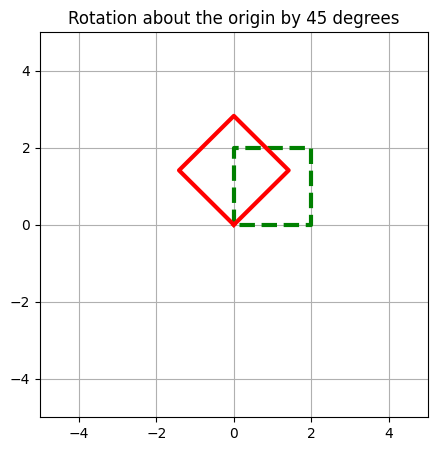

In [51]:
def rotate(matrix, theta):
    thetaRad = math.radians(theta)
    rotate_matrix = [[2 * math.cos(thetaRad), -2 * math.sin(thetaRad)], [2 * math.sin(thetaRad), 2 * math.cos(thetaRad)]]
    illustrate(matrix, rotate_matrix, 'r')
    plt.title('Rotation about the origin by ' + str(theta) + ' degrees')

theta = 45
rotate(matrix, theta)

### 6. Phép nén theo hướng trục $x$ với hệ số $k$ ($0 < k < 1$)
Giả sử hệ số $k = 0.5$

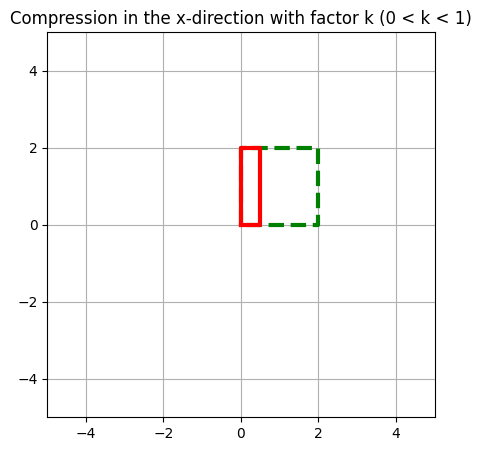

In [52]:
def compress_x_direction(matrix, k):
    compress_matrix = [[k, 0], [0, 2]]
    illustrate(matrix, compress_matrix, 'r')
    plt.title('Compression in the x-direction with factor k (0 < k < 1)')

k = 0.5
compress_x_direction(matrix, k)

### 7. Phép nén theo hướng trục $y$ với hệ số $k$ ($0 < k < 1$):
Giả sử hệ số $k = 0.5$

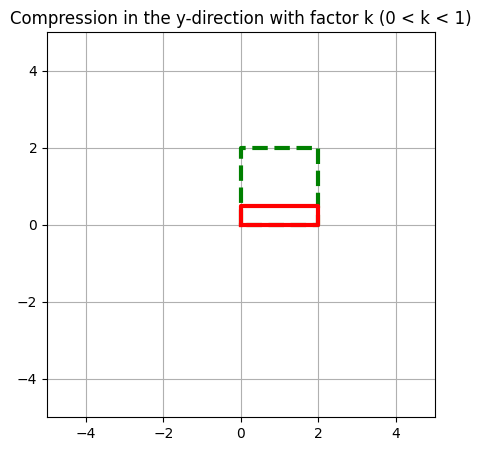

In [53]:
def compress_y_direction(matrix, k):
    compress_matrix = [[2, 0], [0, k]]
    illustrate(matrix, compress_matrix, 'r')
    plt.title('Compression in the y-direction with factor k (0 < k < 1)')

k = 0.5
compress_y_direction(matrix, k)

### 8. Phép mở rộng theo hướng trục $x$ với hệ số $k$ ($k>1$):
Giả sử hệ số $k = 4$

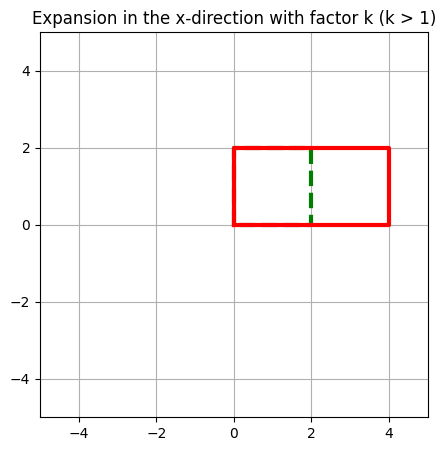

In [54]:
def expansion_x_direction(matrix, k):
    expansion_matrix = [[k, 0], [0, 2]]
    illustrate(matrix, expansion_matrix, 'r')
    plt.title('Expansion in the x-direction with factor k (k > 1)')

k = 4
expansion_x_direction(matrix, k)

### 9. Phép mở rộng theo hướng trục Y với hệ số k ($k>1$):
Giả sử hệ số k = 4

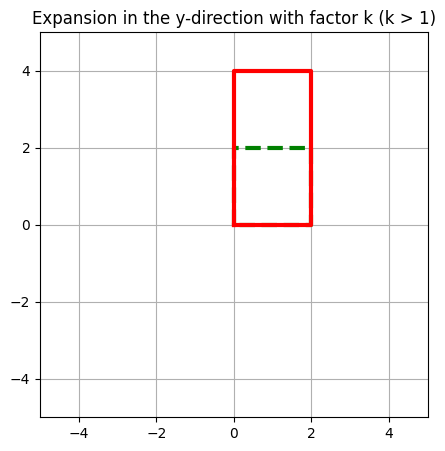

In [55]:
def expansion_y_direction(matrix, k):
    expansion_matrix = [[2, 0], [0, k]]
    illustrate(matrix, expansion_matrix, 'r')
    plt.title('Expansion in the y-direction with factor k (k > 1)')

k = 4
expansion_y_direction(matrix, k)

### 10. Phép trượt nghiêng theo trục $x$ với hệ số $k$:

In [56]:
def shear_x_direction(matrix, k):
    shear_matrix = [[2, k], [0, 2]]
    illustrate(matrix, shear_matrix, 'r')
    plt.title('Shear in the x-direction with factor k')

#### 10.1. Theo chiều dương của trục $x$ ($k>0$):
Giả sử $k = 2$

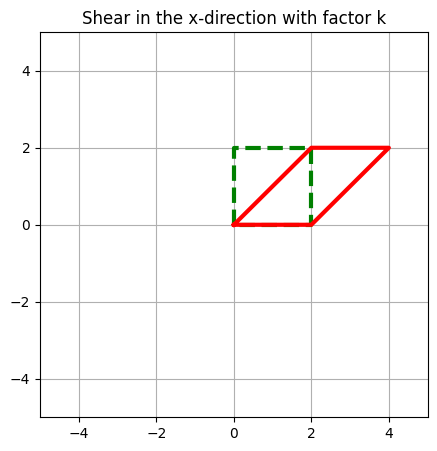

In [57]:
k = 2
shear_x_direction(matrix, k)

#### 10.2. Theo chiều âm của trục $x$ ($k<0$):
Giả sử $k = -2$

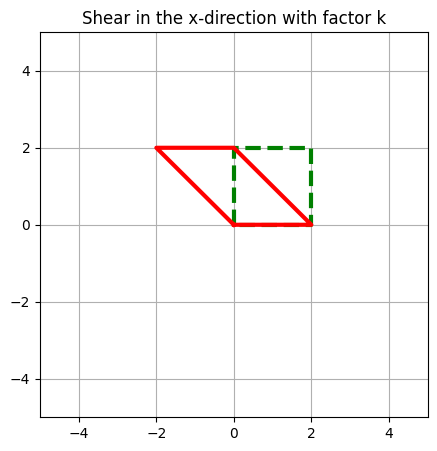

In [58]:
k = -2
shear_x_direction(matrix, k)

### 11. Phép trượt nghiêng theo trục $y$ với hệ số $k$:

In [59]:
def shear_y_direction(matrix, k):
    shear_matrix = [[2, 0], [k, 2]]
    illustrate(matrix, shear_matrix, 'r')
    plt.title('Shear in the y-direction with factor k')

#### 11.1. Theo chiều dương của trục $y$ ($k>0$):
Giả sử $k = 2$

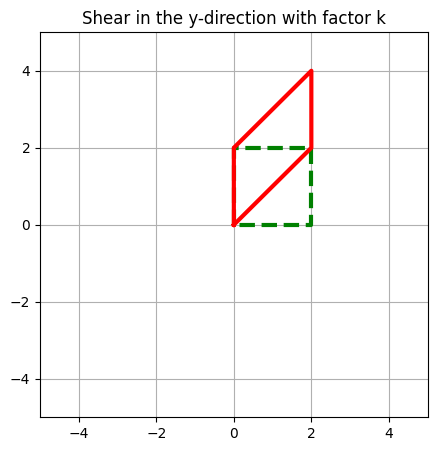

In [60]:
k = 2
shear_y_direction(matrix, k)

#### 11.2. Theo chiều âm của trục $y$ ($k<0$):
Giả sử $k = -2$

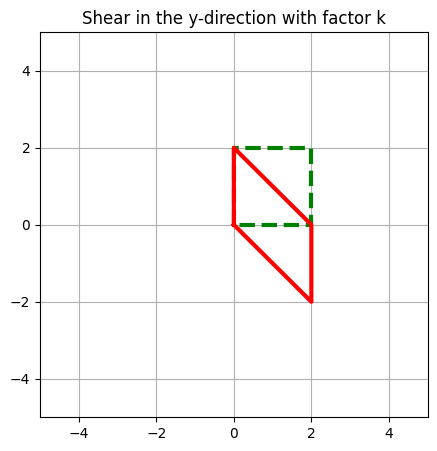

In [61]:
k = -2
shear_y_direction(matrix, k)